<h1>Notebook<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scénario" data-toc-modified-id="Scénario-1">Scénario</a></span></li><li><span><a href="#Mission" data-toc-modified-id="Mission-2">Mission</a></span></li><li><span><a href="#Partie-2:-Analyses" data-toc-modified-id="Partie-2:-Analyses-3">Partie 2: Analyses</a></span><ul class="toc-item"><li><span><a href="#Répartition-des-pays" data-toc-modified-id="Répartition-des-pays-3.1">Répartition des pays</a></span><ul class="toc-item"><li><span><a href="#les-pays-exportateurs-de-viandes-de-volailles" data-toc-modified-id="les-pays-exportateurs-de-viandes-de-volailles-3.1.1">les pays exportateurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-importateurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-importateurs-de-viandes-de-volailles-3.1.2">Les pays importateurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-producteurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-producteurs-de-viandes-de-volailles-3.1.3">Les pays producteurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-consommateurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-consommateurs-de-viandes-de-volailles-3.1.4">Les pays consommateurs de viandes de volailles</a></span></li></ul></li><li><span><a href="#Corrélation-entre-features" data-toc-modified-id="Corrélation-entre-features-3.2">Corrélation entre features</a></span></li><li><span><a href="#Classification-ascendante-hiérarchique" data-toc-modified-id="Classification-ascendante-hiérarchique-3.3">Classification ascendante hiérarchique</a></span><ul class="toc-item"><li><span><a href="#Réaliser-un-clustering-hiérarchique" data-toc-modified-id="Réaliser-un-clustering-hiérarchique-3.3.1">Réaliser un clustering hiérarchique</a></span></li><li><span><a href="#Centroides" data-toc-modified-id="Centroides-3.3.2">Centroides</a></span></li><li><span><a href="#Visualisation-cluster" data-toc-modified-id="Visualisation-cluster-3.3.3">Visualisation cluster</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-3.3.4">Heatmap</a></span></li></ul></li><li><span><a href="#Algorithme-du-K-means" data-toc-modified-id="Algorithme-du-K-means-3.4">Algorithme du K-means</a></span><ul class="toc-item"><li><span><a href="#K-value" data-toc-modified-id="K-value-3.4.1">K value</a></span></li><li><span><a href="#Centroides" data-toc-modified-id="Centroides-3.4.2">Centroides</a></span></li><li><span><a href="#Visualisation-cluster" data-toc-modified-id="Visualisation-cluster-3.4.3">Visualisation cluster</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-3.4.4">Heatmap</a></span></li></ul></li><li><span><a href="#Analyse-en-Composante-Principale-(ACP)" data-toc-modified-id="Analyse-en-Composante-Principale-(ACP)-3.5">Analyse en Composante Principale (ACP)</a></span><ul class="toc-item"><li><span><a href="#Diagramme-éboulis-des-valeurs-propres" data-toc-modified-id="Diagramme-éboulis-des-valeurs-propres-3.5.1">Diagramme éboulis des valeurs propres</a></span></li><li><span><a href="#Analyse-PCA-1-&amp;-PCA2" data-toc-modified-id="Analyse-PCA-1-&amp;-PCA2-3.5.2">Analyse PCA 1 &amp; PCA2</a></span></li><li><span><a href="#Analyse-PCA-3-&amp;-PCA-4" data-toc-modified-id="Analyse-PCA-3-&amp;-PCA-4-3.5.3">Analyse PCA 3 &amp; PCA 4</a></span></li><li><span><a href="#Analyse-PCA-1-PCA2-et-PCA3" data-toc-modified-id="Analyse-PCA-1-PCA2-et-PCA3-3.5.4">Analyse PCA 1 PCA2 et PCA3</a></span></li></ul></li><li><span><a href="#Tests-d'hypothèses" data-toc-modified-id="Tests-d'hypothèses-3.6">Tests d'hypothèses</a></span><ul class="toc-item"><li><span><a href="#Verification-de-la-normalité" data-toc-modified-id="Verification-de-la-normalité-3.6.1">Verification de la normalité</a></span></li><li><span><a href="#Analyse-non-parametique-(Kruskal-Wallis)" data-toc-modified-id="Analyse-non-parametique-(Kruskal-Wallis)-3.6.2">Analyse non parametique (Kruskal-Wallis)</a></span></li></ul></li></ul></li></ul></div>

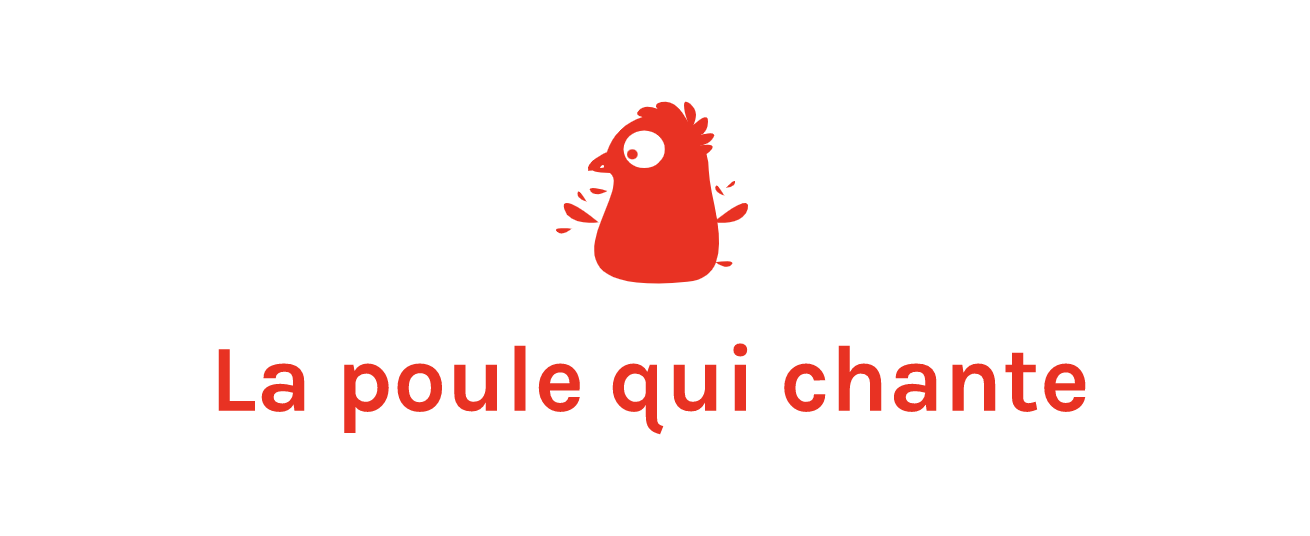

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import numpy as np
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pca
from pca import pca
from sklearn import preprocessing, cluster, metrics, decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from scipy.stats import norm
import scipy.stats as st
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

# Scénario
Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.

# Mission
Pars des données de la FAO (Food and Agriculture Organization) que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en open data que tu souhaites sur le site de la FAO.

Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...

In [3]:
# import du fichier
df_all_items = pd.read_csv("data_export_volailles.csv")

In [4]:
df_all_items = df_all_items.drop("Unnamed: 0", axis=1)

# Partie 2: Analyses

## Répartition des pays

### les pays exportateurs de viandes de volailles

In [5]:
# les plus gros exportateurs de viandes de volailles
df_all_items.sort_values(by='Export viandes Volailles',
                         ascending=False, inplace=True)
df_all_items.head(10)

Code ISO        Zone  Population 2017  \
23       BRA      Brésil     2.078338e+08   
51       USA  États-Unis     3.250848e+08   
120      NLD    Pays-Bas     1.702135e+07   
123      POL     Pologne     3.795318e+07   
147      THA   Thaïlande     6.920981e+07   
67       HKG   Hong Kong     7.306322e+06   
17       BEL    Belgique     1.141975e+07   
4        DEU   Allemagne     8.265841e+07   
32       CHN       Chine     1.421022e+09   
153      TUR     Turquie     8.111645e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
23                                  18.90                      -0.42   
51                                  15.40                       0.34   
120                                  6.88                       0.92   
123                                 -1.57                       0.52   
147                                  9.94                      -0.75   
67                                  10.60                       0.83   
17                                  11.07                       0.43   
4                                    1.54                       0.59   
32                                  10.11                       0.00   
153                                 28.27                      -1.79   

     PIB par habitant  Export viandes Volailles  \
23            14524.6                    4223.0   
51            60109.7                    3692.0   
120           55088.6                    1418.0   
123           30064.5                    1025.0   
147           17423.0                     796.0   
67            59849.2                     663.0   
17            50442.3                     656.0   
4             52952.9                     646.0   
32            14621.2                     576.0   
153           27913.8                     429.0   

     % Export viandes vs total aliments  \
23                                 4.70   
51                                 3.66   
120                                5.82   
123                                9.85   
147                                1.28   
67                                23.14   
17                                 5.41   
4                                  6.17   
32                                 2.22   
153                                2.42   

     % Export viandes Volailles vs total aliments  \
23                                           2.74   
51                                           1.78   
120                                          2.41   
123                                          4.30   
147                                          1.18   
67                                          18.37   
17                                           2.02   
4                                            1.10   
32                                           1.43   
153                                          2.32   

     % Export viandes Volailles vs total viandes  ...  \
23                                         58.43  ...   
51                                         48.68  ...   
120                                        41.37  ...   
123                                        43.71  ...   
147                                        92.34  ...   
67                                         79.40  ...   
17                                         37.38  ...   
4                                          17.81  ...   
32                                         64.43  ...   
153                                        95.97  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
23                                          4.48                   9982.0   
51                                          5.26                  18100.0   
120                                        35.72                    346.0   
123                                         6.56                   1150.0   
147                                         9.52                    896.0   
67   

In [6]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Export viandes Volailles',
                    color_continuous_scale='sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text='Les pays exportateurs de viandes de volailles 2017', title_x=0.5,
    font=dict(size=10))
fig.show()

### Les pays importateurs de viandes de volailles

In [7]:
# les plus gros importateurs de viandes de volailles
df_all_items.sort_values(by='Import viandes Volailles',
                         ascending=False, inplace=True)
df_all_items.head(10)

Code ISO             Zone  Population 2017  \
78       JPN            Japon     1.275027e+08   
103      MEX          Mexique     1.247773e+08   
67       HKG        Hong Kong     7.306322e+06   
4        DEU        Allemagne     8.265841e+07   
126      GBR      Royaume-Uni     6.672746e+07   
7        SAU  Arabie saoudite     3.310118e+07   
120      NLD         Pays-Bas     1.702135e+07   
1        ZAF   Afrique du Sud     5.700976e+07   
72       IRQ             Irak     3.755278e+07   
32       CHN            Chine     1.421022e+09   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
78                                  -0.02                       1.11   
103                                 26.17                      -0.72   
67                                  10.60                       0.83   
4                                    1.54                       0.59   
126                                 13.24                       0.33   
7                                   60.19                      -0.58   
120                                  6.88                       0.92   
1                                   26.78                      -0.28   
72                                  59.82                      -2.31   
32                                  10.11                       0.00   

     PIB par habitant  Export viandes Volailles  \
78            40966.6                      10.0   
103           19721.3                       9.0   
67            59849.2                     663.0   
4             52952.9                     646.0   
126           45744.7                     359.0   
7             47306.2                      10.0   
120           55088.6                    1418.0   
1             12701.3                      63.0   
72            10719.0                       0.0   
32            14621.2                     576.0   

     % Export viandes vs total aliments  \
78                                 1.12   
103                                1.64   
67                                23.14   
4                                  6.17   
126                                5.94   
7                                  0.80   
120                                5.82   
1                                  1.35   
72                                 0.00   
32                                 2.22   

     % Export viandes Volailles vs total aliments  \
78                                           0.59   
103                                          0.04   
67                                          18.37   
4                                            1.10   
126                                          2.45   
7                                            0.45   
120                                          2.41   
1                                            0.57   
72                                           0.00   
32                                           1.43   

     % Export viandes Volailles vs total viandes  ...  \
78                                         52.63  ...   
103                                         2.17  ...   
67                                         79.40  ...   
4                                          17.81  ...   
126                                        41.22  ...   
7                                          55.56  ...   
120                                        41.37  ...   
1                                          42.57  ...   
72                                          0.00  ...   
32                                         64.43  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
78                                         32.00                   2359.0   
103                                        47.76                   4058.0   
67                                         48.45                    391.0   
4                                          31.52                   1609.0   
126                        

In [8]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Import viandes Volailles',
                    color_continuous_scale='sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text='Les pays importateurs de viandes de volailles 2017', title_x=0.5,
    font=dict(size=10))
fig.show()

### Les pays producteurs de viandes de volailles

In [9]:
# les plus gros producteurs de viandes de volailles
df_all_items.sort_values(
    by='Production viandes Volailles', ascending=False, inplace=True)
df_all_items.head(10)

Code ISO        Zone  Population 2017  \
51       USA  États-Unis     3.250848e+08   
32       CHN       Chine     1.421022e+09   
23       BRA      Brésil     2.078338e+08   
127      RUS      Russie     1.455301e+08   
69       IND        Inde     1.338677e+09   
103      MEX     Mexique     1.247773e+08   
123      POL     Pologne     3.795318e+07   
70       IDN   Indonésie     2.646510e+08   
78       JPN       Japon     1.275027e+08   
153      TUR     Turquie     8.111645e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
51                                  15.40                       0.34   
32                                  10.11                       0.00   
23                                  18.90                      -0.42   
127                                 -0.60                      -0.64   
69                                  26.70                      -0.76   
103                                 26.17                      -0.72   
123                                 -1.57                       0.52   
70                                  25.12                      -0.50   
78                                  -0.02                       1.11   
153                                 28.27                      -1.79   

     PIB par habitant  Export viandes Volailles  \
51            60109.7                    3692.0   
32            14621.2                     576.0   
23            14524.6                    4223.0   
127           25926.4                     115.0   
69             6182.9                       4.0   
103           19721.3                       9.0   
123           30064.5                    1025.0   
70            10935.6                       0.0   
78            40966.6                      10.0   
153           27913.8                     429.0   

     % Export viandes vs total aliments  \
51                                 3.66   
32                                 2.22   
23                                 4.70   
127                                0.37   
69                                 3.85   
103                                1.64   
123                                9.85   
70                                 0.01   
78                                 1.12   
153                                2.42   

     % Export viandes Volailles vs total aliments  \
51                                           1.78   
32                                           1.43   
23                                           2.74   
127                                          0.20   
69                                           0.01   
103                                          0.04   
123                                          4.30   
70                                           0.00   
78                                           0.59   
153                                          2.32   

     % Export viandes Volailles vs total viandes  ...  \
51                                         48.68  ...   
32                                         64.43  ...   
23                                         58.43  ...   
127                                        54.50  ...   
69                                          0.30  ...   
103                                         2.17  ...   
123                                        43.71  ...   
70                                          0.00  ...   
78                                         52.63  ...   
153                                        95.97  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
51                                          5.26                  18100.0   
32                                         14.63                  17518.0   
23                                          4.48                   9982.0   
127                                        21.54                   4509.0   
69                                          0.00                   2965.0   
103  

In [10]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Production viandes Volailles',
                    color_continuous_scale='sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text='Les pays producteurs de viandes de volailles 2017', title_x=0.5,
    font=dict(size=10))
fig.show()

### Les pays consommateurs de viandes de volailles

In [11]:
# les plus gros consommateurs de viandes de volailles
df_all_items.sort_values(by='Conso Viandes Volailles',
                         ascending=False, inplace=True)
df_all_items.head(10)

Code ISO            Zone  Population 2017  \
51       USA      États-Unis     3.250848e+08   
32       CHN           Chine     1.421022e+09   
23       BRA          Brésil     2.078338e+08   
127      RUS          Russie     1.455301e+08   
103      MEX         Mexique     1.247773e+08   
69       IND            Inde     1.338677e+09   
78       JPN           Japon     1.275027e+08   
71       IRN            Iran     8.067388e+07   
126      GBR     Royaume-Uni     6.672746e+07   
1        ZAF  Afrique du Sud     5.700976e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
51                                  15.40                       0.34   
32                                  10.11                       0.00   
23                                  18.90                      -0.42   
127                                 -0.60                      -0.64   
103                                 26.17                      -0.72   
69                                  26.70                      -0.76   
78                                  -0.02                       1.11   
71                                  22.93                      -0.93   
126                                 13.24                       0.33   
1                                   26.78                      -0.28   

     PIB par habitant  Export viandes Volailles  \
51            60109.7                    3692.0   
32            14621.2                     576.0   
23            14524.6                    4223.0   
127           25926.4                     115.0   
103           19721.3                       9.0   
69             6182.9                       4.0   
78            40966.6                      10.0   
71            14535.9                      45.0   
126           45744.7                     359.0   
1             12701.3                      63.0   

     % Export viandes vs total aliments  \
51                                 3.66   
32                                 2.22   
23                                 4.70   
127                                0.37   
103                                1.64   
69                                 3.85   
78                                 1.12   
71                                 0.67   
126                                5.94   
1                                  1.35   

     % Export viandes Volailles vs total aliments  \
51                                           1.78   
32                                           1.43   
23                                           2.74   
127                                          0.20   
103                                          0.04   
69                                           0.01   
78                                           0.59   
71                                           0.63   
126                                          2.45   
1                                            0.57   

     % Export viandes Volailles vs total viandes  ...  \
51                                         48.68  ...   
32                                         64.43  ...   
23                                         58.43  ...   
127                                        54.50  ...   
103                                         2.17  ...   
69                                          0.30  ...   
78                                         52.63  ...   
71                                         93.75  ...   
126                                        41.22  ...   
1                                          42.57  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
51                                          5.26                  18100.0   
32                                         14.63                  17518.0   
23                                          4.48                   9982.0   
127                                        21.54                   4509.0   
103                                   

In [12]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Conso Viandes Volailles',
                    color_continuous_scale='sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text='Les pays consommateurs de viandes de volailles 2017', title_x=0.5,
    font=dict(size=10))
fig.show()

## Corrélation entre features

<ipython-input-13-e530f52d4eb2>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



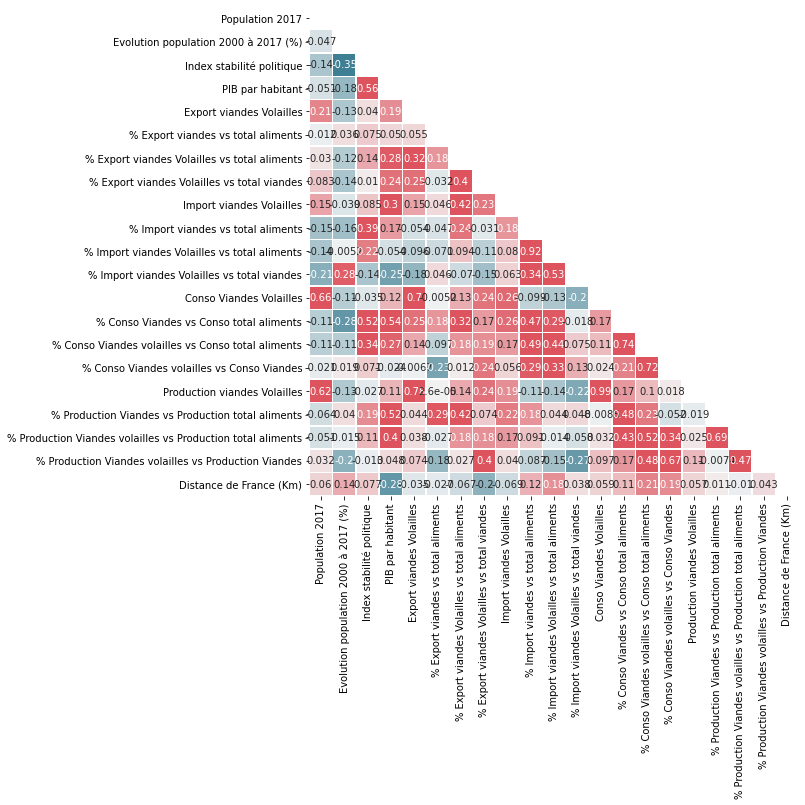

In [13]:
# Compute the correlation matrix
corr = df_all_items.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
                  square=True, linewidths=.5, cbar=None)

In [14]:
df = df_all_items[['Zone', 'Distance de France (Km)',
                  'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
                   'PIB par habitant', '% Import viandes Volailles vs total aliments',
                   '% Conso Viandes volailles vs Conso total aliments']]

<ipython-input-15-6a1673351516>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



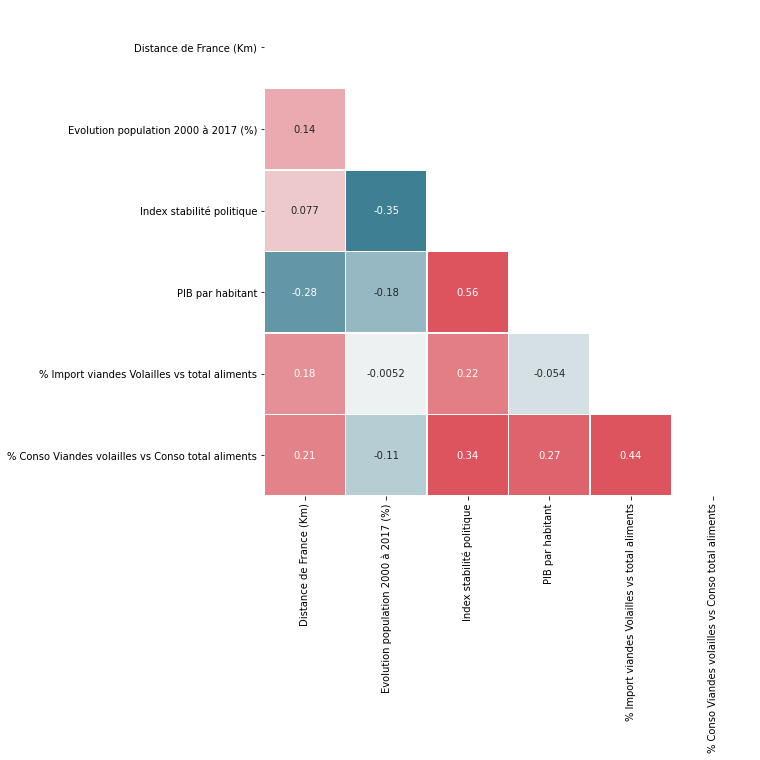

In [15]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
                  square=True, linewidths=.5, cbar=None)

## Classification ascendante hiérarchique

In [16]:
df = df.set_index('Zone')
df_cah = df
df_cah

Distance de France (Km)  \
Zone                                            
États-Unis                             6166.0   
Chine                                  8216.0   
Brésil                                 8602.0   
Russie                                 2486.0   
Mexique                                9086.0   
...                                       ...   
Dominique                              6822.0   
Kiribati                              14362.0   
Sao Tomé-et-Principe                   5340.0   
Laos                                   9237.0   
Ouzbékistan                            5147.0   

                      Evolution population 2000 à 2017 (%)  \
Zone                                                         
États-Unis                                           15.40   
Chine                                                10.11   
Brésil                                               18.90   
Russie                                               -0.60   
Mexique                                              26.17   
...                                                    ...   
Dominique                                             2.60   
Kiribati                                             35.26   
Sao Tomé-et-Principe                                 45.57   
Laos                                                 30.61   
Ouzbékistan                                          29.03   

                      Index stabilité politique  PIB par habitant  \
Zone                                                                
États-Unis                                 0.34           60109.7   
Chine                                      0.00           14621.2   
Brésil                                    -0.42           14524.6   
Russie                                    -0.64           25926.4   
Mexique                                   -0.72           19721.3   
...                                         ...               ...   
Dominique                                  1.20           11304.0   
Kiribati                                   0.88            2235.7   
Sao Tomé-et-Principe                       0.19            3952.9   
Laos                                       0.40            7257.8   
Ouzbékistan                               -0.24            6518.8   

                      % Import viandes Volailles vs total aliments  \
Zone                                                                 
États-Unis                                                    0.15   
Chine                                                         0.22   
Brésil                                                        0.02   
Russie                                                        0.94   
Mexique                                                       2.18   
...                                                            ...   
Dominique                                                    15.38   
Kiribati                                                      3.45   
Sao Tomé-et-Principe                                          4.65   
Laos                                                          0.00   
Ouzbékistan                                                   0.00   

                      % Conso Viandes volailles vs Conso total aliments  
Zone                                                                     
États-Unis                                                         5.62  
Chine                                                              1.27  
Brésil                                                             6.23  
Russie                                                             3.49  
Mexique                                                            4.37  
...                                                                 ...  
Dominique                                                          4.35  
Kiribati                                                           2.86  
Sao Tomé-et-Principe        

In [17]:
# Données
X_cah = df_cah.select_dtypes('number')

In [18]:
# Etiquettes des échantillons
y_cah = df_cah.index

In [19]:
scaler = preprocessing.StandardScaler()
X_scaled_cah = scaler.fit_transform(X_cah)

In [20]:
# clustering hierarchique
Z = linkage(X_scaled_cah, 'ward')

### Réaliser un clustering hiérarchique

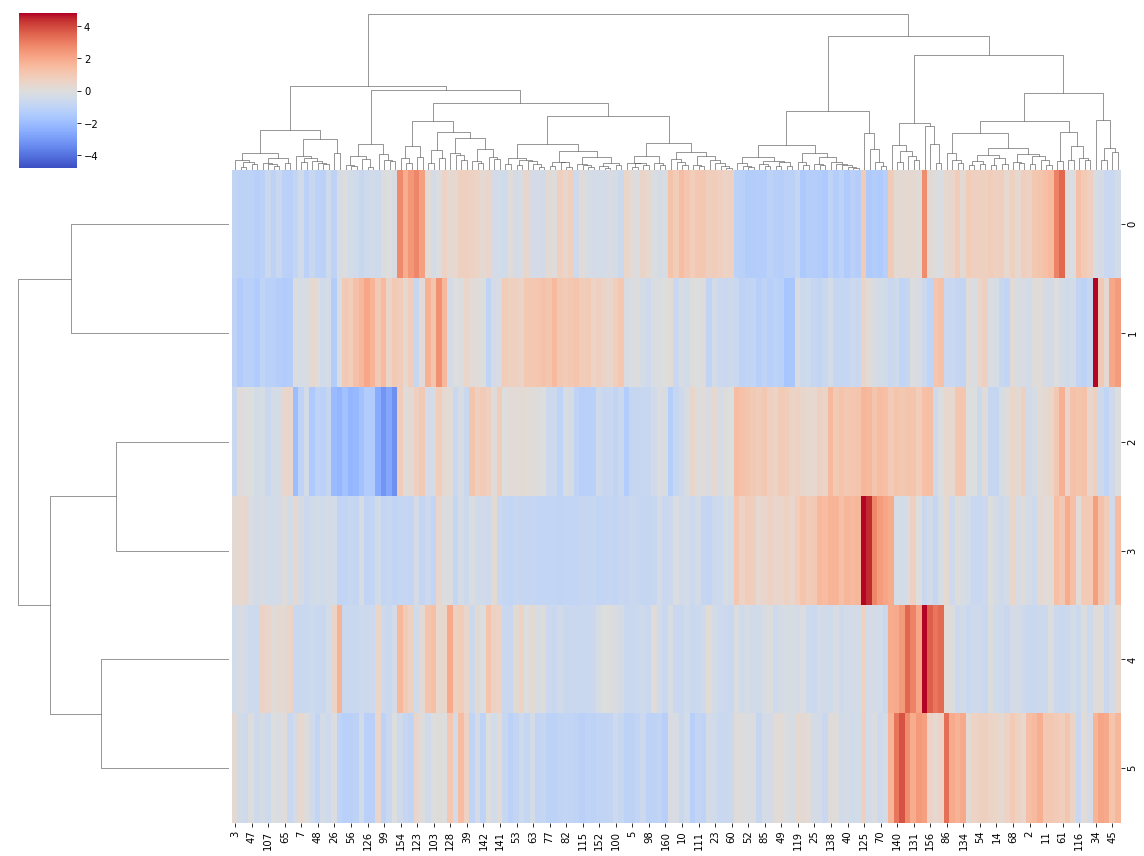

In [21]:
metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(X_scaled_cah.T, figsize=(16, 12), metric=metric, method=method, cmap=cmap,
                             row_cluster=True, col_cluster=True,
                             center=0.0, vmin=-4.8, vmax=4.8)

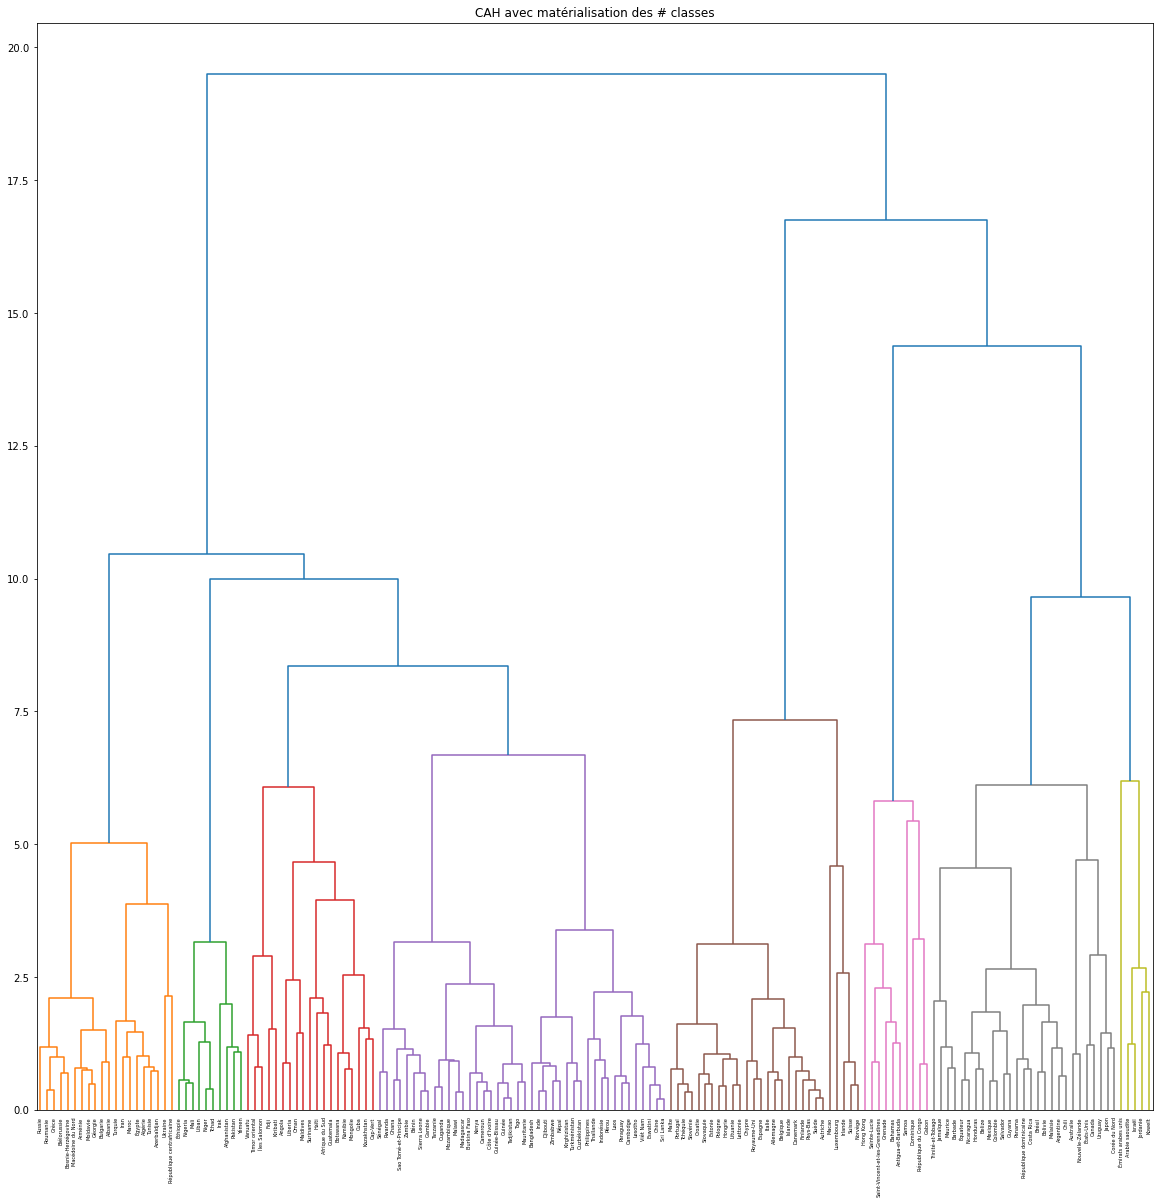

In [22]:
# Création d'un dendrogramme avec les clusters en couleurs
Z = linkage(X_scaled_cah, method='ward', metric='euclidean')
fig = plt.figure(figsize=(20, 20))
plt.title('CAH avec matérialisation des # classes')
dendrogram(Z, labels=df_cah.index, color_threshold=8)

plt.savefig('cah.png')
plt.show()

# découpage à la hauteur t = n ==> identifiants de n groupes obtenus
groupes_cah = fcluster(Z, t=7.5, criterion='distance')

In [23]:
df_cah["CAH"] = groupes_cah
df_cah.head()

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Zone                                                                        
États-Unis                   6166.0                                 15.40   
Chine                        8216.0                                 10.11   
Brésil                       8602.0                                 18.90   
Russie                       2486.0                                 -0.60   
Mexique                      9086.0                                 26.17   

            Index stabilité politique  PIB par habitant  \
Zone                                                      
États-Unis                       0.34           60109.7   
Chine                            0.00           14621.2   
Brésil                          -0.42           14524.6   
Russie                          -0.64           25926.4   
Mexique                         -0.72           19721.3   

            % Import viandes Volailles vs total aliments  \
Zone                                                       
États-Unis                                          0.15   
Chine                                               0.22   
Brésil                                              0.02   
Russie                                              0.94   
Mexique                                             2.18   

            % Conso Viandes volailles vs Conso total aliments  CAH  
Zone                                                                
États-Unis                                               5.62    7  
Chine                                                    1.27    4  
Brésil                                                   6.23    7  
Russie                                                   3.49    1  
Mexique                                                  4.37    7

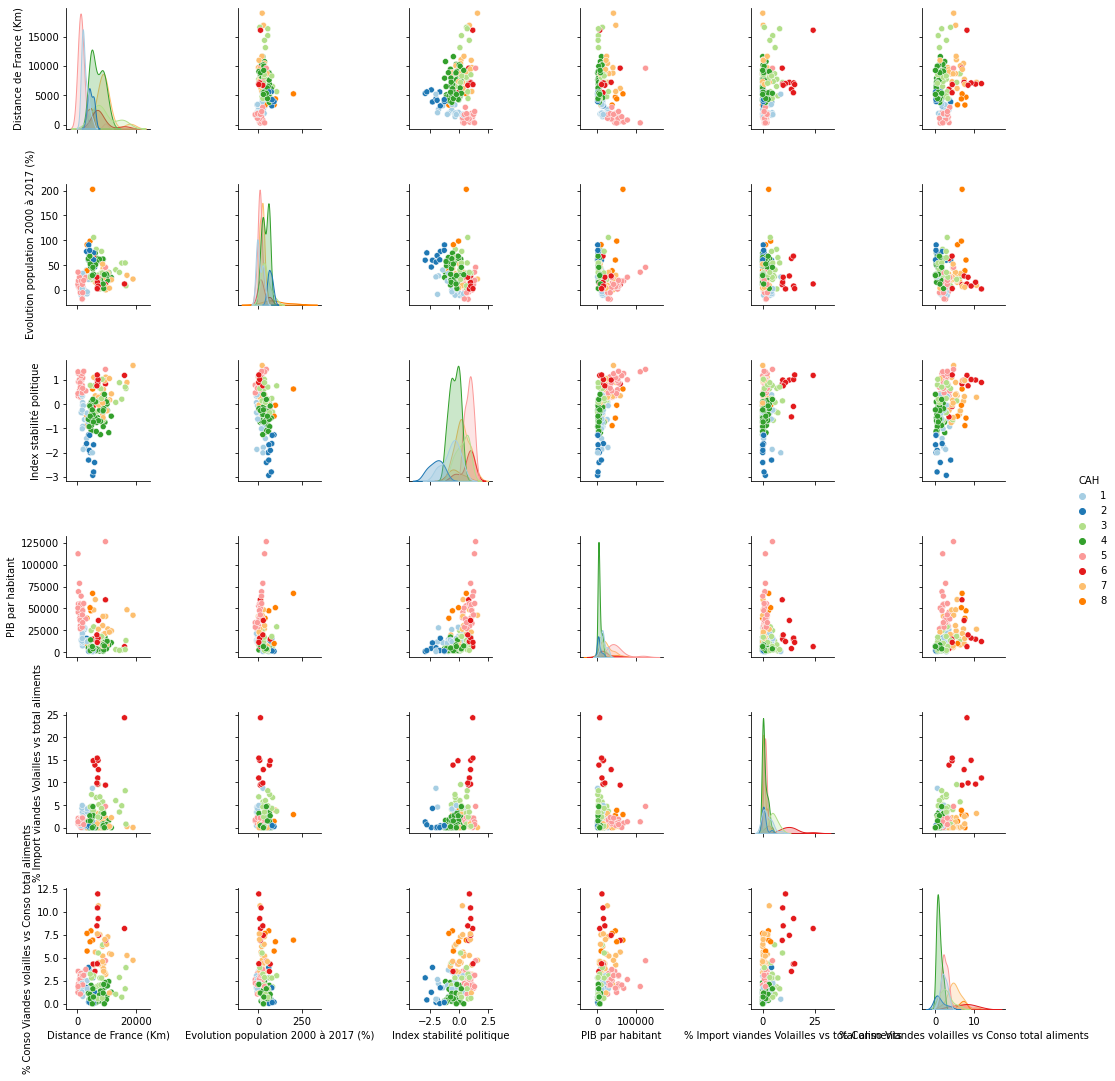

In [24]:
sns.pairplot(df_cah, kind="scatter", hue = 'CAH', palette = "Paired")

### Centroides

In [25]:
# les moyennes des groupes CAH par feature
df_cah_gb = df_cah.groupby(["CAH"]).mean()
df_cah_gb

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
1                2498.600000                              7.044000   
2                4620.600000                             67.413000   
3                9132.947368                             41.697368   
4                6883.357143                             40.649524   
5                1511.357143                              8.610714   
6                7890.500000                             23.549000   
7                9431.703704                             20.561481   
8                4200.000000                             98.184000   

     Index stabilité politique  PIB par habitant  \
CAH                                                
1                    -0.649000      15546.795000   
2                    -2.024000       4650.580000   
3                     0.274211      10610.052632   
4                    -0.410952       5440.007143   
5                     0.856429      50073.917857   
6                     0.721000      19642.970000   
7                     0.284074      23230.066667   
8                    -0.280000      42836.600000   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
1                                        2.119500   
2                                        0.741000   
3                                        4.810000   
4                                        0.964286   
5                                        1.284286   
6                                       13.587000   
7                                        0.802222   
8                                        2.172000   

     % Conso Viandes volailles vs Conso total aliments  
CAH                                                     
1                                             2.155500  
2                                             1.115000  
3                                             2.645789  
4                                             0.925000  
5                                             2.509643  
6                                             7.479000  
7                                             5.059259  
8                                             6.994000

In [26]:
# les pays par groupe cah
for i in range(1, 9):
    print("Groupe {}:".format(i))
    print(", ".join(df_cah[df_cah['CAH'] ==
          i].index.get_level_values('Zone').sort_values()))

Groupe 1:
Albanie, Algérie, Arménie, Azerbaïdjan, Biélorussie, Bosnie-Herzégovine, Bulgarie, Grèce, Géorgie, Iran, Macédoine du Nord, Maroc, Moldavie, Roumanie, Russie, République centrafricaine, Tunisie, Turquie, Ukraine, Égypte
Groupe 2:
Afghanistan, Irak, Liban, Mali, Niger, Nigeria, Pakistan, Tchad, Yémen, Éthiopie
Groupe 3:
Afrique du Sud, Angola, Botswana, Cap-Vert, Cuba, Fidji, Guatemala, Haïti, Kazakhstan, Kiribati, Liberia, Maldives, Mongolie, Namibie, Oman, Suriname, Timor oriental, Vanuatu, Îles Salomon
Groupe 4:
Bangladesh, Burkina Faso, Bénin, Cambodge, Cameroun, Chine, Côte d'Ivoire, Djibouti, Eswatini, Gambie, Ghana, Guinée, Guinée-Bissau, Inde, Indonésie, Kenya, Kirghizistan, Laos, Lesotho, Madagascar, Malawi, Mauritanie, Mozambique, Népal, Ouganda, Ouzbékistan, Paraguay, Philippines, Pérou, Rwanda, Sao Tomé-et-Principe, Sierra Leone, Sri Lanka, Sénégal, Tadjikistan, Tanzanie, Thaïlande, Togo, Turkménistan, Viêt Nam, Zambie, Zimbabwe
Groupe 5:
Allemagne, Autriche, Belgi

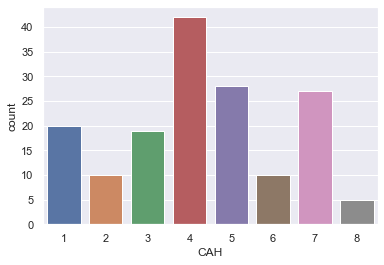

In [27]:
# repartition nb de pays /cluster
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="CAH", data=df_cah)

### Visualisation cluster

In [28]:
df_iso_pays = df_all_items[['Zone', 'Code ISO']]

In [29]:
df_cah_iso = pd.merge(df_iso_pays, df_cah, on="Zone")

In [30]:
df_cah_iso = df_cah_iso.sort_values(by='CAH', ascending=True)

In [31]:
df_cah_iso['CAH'] = df_cah_iso['CAH'].astype(object)

In [32]:
fig = px.choropleth(
    df_cah_iso,
    locations=df_cah_iso['Code ISO'],
    color=df_cah_iso['CAH'],
    hover_name=df_cah_iso["Zone"],
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'CAH': 'Cluster'})

fig.update_layout(
    title_text='Les Clusters avec CAH', title_x=0.5,
    font=dict(size=10))
fig.show()

### Heatmap

In [33]:
df_cah = df_cah.reset_index("Zone")
df_cah = df_cah.set_index('CAH')
df_cah = df_cah.drop(['Zone'], axis=1)
df_cah

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
7                     6166.0                                 15.40   
4                     8216.0                                 10.11   
7                     8602.0                                 18.90   
1                     2486.0                                 -0.60   
7                     9086.0                                 26.17   
..                       ...                                   ...   
6                     6822.0                                  2.60   
3                    14362.0                                 35.26   
4                     5340.0                                 45.57   
4                     9237.0                                 30.61   
4                     5147.0                                 29.03   

     Index stabilité politique  PIB par habitant  \
CAH                                                
7                         0.34           60109.7   
4                         0.00           14621.2   
7                        -0.42           14524.6   
1                        -0.64           25926.4   
7                        -0.72           19721.3   
..                         ...               ...   
6                         1.20           11304.0   
3                         0.88            2235.7   
4                         0.19            3952.9   
4                         0.40            7257.8   
4                        -0.24            6518.8   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
7                                            0.15   
4                                            0.22   
7                                            0.02   
1                                            0.94   
7                                            2.18   
..                                            ...   
6                                           15.38   
3                                            3.45   
4                                            4.65   
4                                            0.00   
4                                            0.00   

     % Conso Viandes volailles vs Conso total aliments  
CAH                                                     
7                                                 5.62  
4                                                 1.27  
7                                                 6.23  
1                                                 3.49  
7                                                 4.37  
..                                                 ...  
6                                                 4.35  
3                                                 2.86  
4                                                 1.63  
4                                                 0.00  
4                                                 0.00  

[161 rows x 6 columns]

In [34]:
# Centrage et réduction des données
scaler = preprocessing.StandardScaler()
X_scaled_cah = scaler.fit_transform(X_cah)

In [35]:
# On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_cah_c_r = pd.DataFrame(
    X_scaled_cah, index=df_cah.index, columns=df_cah.columns)
df_cah_gb_c_r = df_cah_c_r.groupby(["CAH"]).mean()
df_cah_gb_c_r

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
1                  -0.909520                             -0.786598   
2                  -0.348037                              1.277947   
3                   0.845936                              0.398504   
4                   0.250691                              0.362669   
5                  -1.170746                             -0.733019   
6                   0.517183                             -0.222148   
7                   0.924987                             -0.324317   
8                  -0.459328                              2.330277   

     Index stabilité politique  PIB par habitant  \
CAH                                                
1                    -0.672532         -0.216522   
2                    -2.212491         -0.740896   
3                     0.361437         -0.454100   
4                    -0.405925         -0.702906   
5                     1.013503          1.445076   
6                     0.861828         -0.019396   
7                     0.372483          0.153231   
8                    -0.259263          1.096784   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
1                                       -0.077313   
2                                       -0.460317   
3                                        0.670219   
4                                       -0.398279   
5                                       -0.309370   
6                                        3.108832   
7                                       -0.443307   
8                                       -0.062727   

     % Conso Viandes volailles vs Conso total aliments  
CAH                                                     
1                                            -0.295528  
2                                            -0.733741  
3                                            -0.089039  
4                                            -0.813761  
5                                            -0.146378  
6                                             1.946500  
7                                             0.927410  
8                                             1.742239

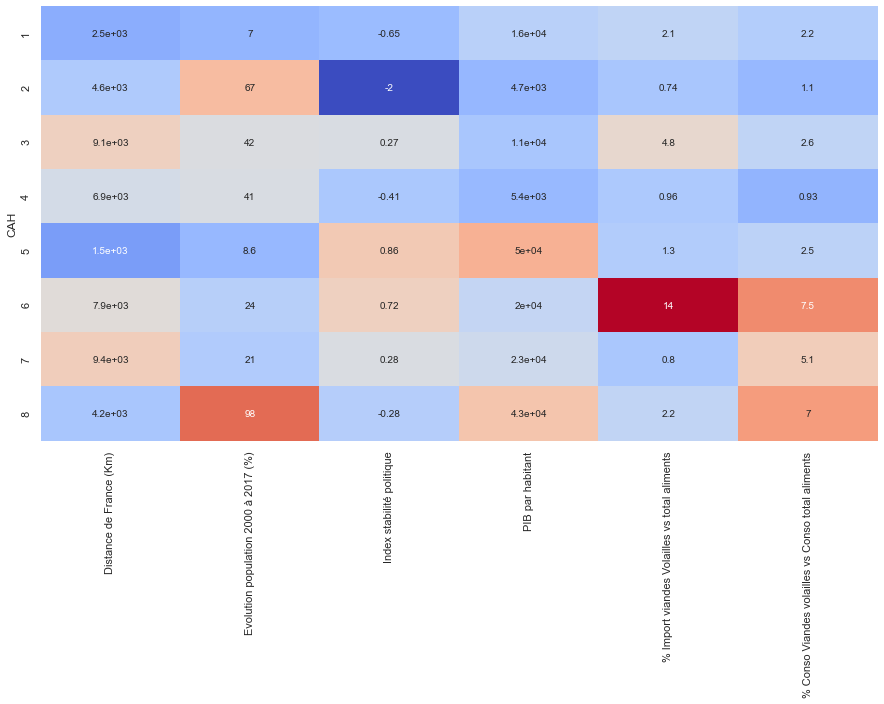

In [36]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_cah_gb_c_r, cmap=cmap, annot=df_cah_gb,
            annot_kws={'size': 10}, cbar=None)
plt.savefig('heatmap_cah.png')

## Algorithme du K-means

In [37]:
df_kmeans = df
df_kmeans.drop(['CAH'], axis=1, inplace=True)
df_kmeans

Distance de France (Km)  \
Zone                                            
États-Unis                             6166.0   
Chine                                  8216.0   
Brésil                                 8602.0   
Russie                                 2486.0   
Mexique                                9086.0   
...                                       ...   
Dominique                              6822.0   
Kiribati                              14362.0   
Sao Tomé-et-Principe                   5340.0   
Laos                                   9237.0   
Ouzbékistan                            5147.0   

                      Evolution population 2000 à 2017 (%)  \
Zone                                                         
États-Unis                                           15.40   
Chine                                                10.11   
Brésil                                               18.90   
Russie                                               -0.60   
Mexique                                              26.17   
...                                                    ...   
Dominique                                             2.60   
Kiribati                                             35.26   
Sao Tomé-et-Principe                                 45.57   
Laos                                                 30.61   
Ouzbékistan                                          29.03   

                      Index stabilité politique  PIB par habitant  \
Zone                                                                
États-Unis                                 0.34           60109.7   
Chine                                      0.00           14621.2   
Brésil                                    -0.42           14524.6   
Russie                                    -0.64           25926.4   
Mexique                                   -0.72           19721.3   
...                                         ...               ...   
Dominique                                  1.20           11304.0   
Kiribati                                   0.88            2235.7   
Sao Tomé-et-Principe                       0.19            3952.9   
Laos                                       0.40            7257.8   
Ouzbékistan                               -0.24            6518.8   

                      % Import viandes Volailles vs total aliments  \
Zone                                                                 
États-Unis                                                    0.15   
Chine                                                         0.22   
Brésil                                                        0.02   
Russie                                                        0.94   
Mexique                                                       2.18   
...                                                            ...   
Dominique                                                    15.38   
Kiribati                                                      3.45   
Sao Tomé-et-Principe                                          4.65   
Laos                                                          0.00   
Ouzbékistan                                                   0.00   

                      % Conso Viandes volailles vs Conso total aliments  
Zone                                                                     
États-Unis                                                         5.62  
Chine                                                              1.27  
Brésil                                                             6.23  
Russie                                                             3.49  
Mexique                                                            4.37  
...                                                                 ...  
Dominique                                                          4.35  
Kiribati                                                           2.86  
Sao Tomé-et-Principe        

In [38]:
# Données
X_kmeans = df_kmeans.select_dtypes('number')

In [39]:
# Etiquettes des échantillons
y_kmeans = df_kmeans.index

In [40]:
scaler = preprocessing.StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

### K value

In [41]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X_kmeans)
                for k in range(1, 19)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

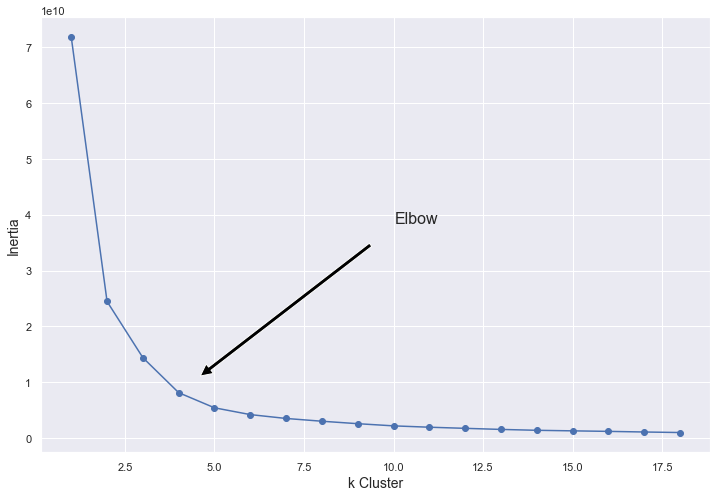

In [42]:
# plot inertia as a function of k and analyze the resulting curve.
plt.figure(figsize=(12, 8))
plt.plot(range(1, 19), inertias, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords="figure fraction",
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

In [43]:
k = 4
kmeans = KMeans(n_clusters=k).fit(X_kmeans)

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [44]:
silhouette_scores = [silhouette_score(X_scaled_kmeans, model.labels_)
                     for model in kmeans_per_k[1:]]   # kmeans_per_k[0] is 1 cluster, not considered

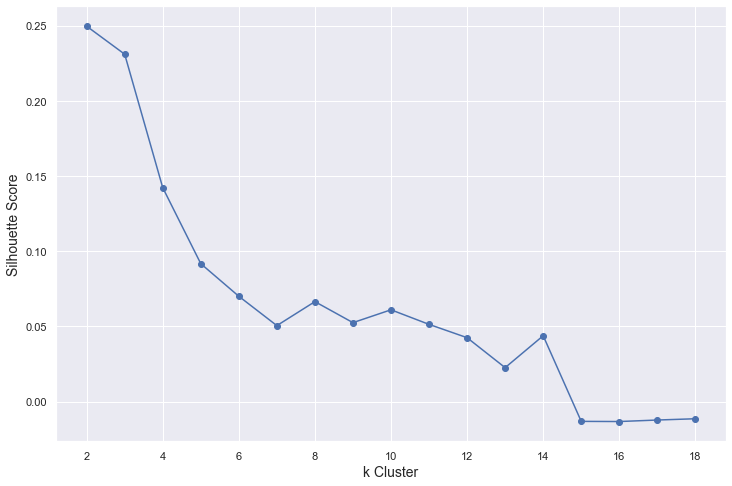

In [45]:
# plot the silhouette score as a function of k
plt.figure(figsize=(12, 8))
plt.plot(range(2, 19), silhouette_scores, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.show()

In [46]:
df_kmeans['Kmeans'] = kmeans.labels_

In [47]:
df_kmeans.head()

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Zone                                                                        
États-Unis                   6166.0                                 15.40   
Chine                        8216.0                                 10.11   
Brésil                       8602.0                                 18.90   
Russie                       2486.0                                 -0.60   
Mexique                      9086.0                                 26.17   

            Index stabilité politique  PIB par habitant  \
Zone                                                      
États-Unis                       0.34           60109.7   
Chine                            0.00           14621.2   
Brésil                          -0.42           14524.6   
Russie                          -0.64           25926.4   
Mexique                         -0.72           19721.3   

            % Import viandes Volailles vs total aliments  \
Zone                                                       
États-Unis                                          0.15   
Chine                                               0.22   
Brésil                                              0.02   
Russie                                              0.94   
Mexique                                             2.18   

            % Conso Viandes volailles vs Conso total aliments  Kmeans  
Zone                                                                   
États-Unis                                               5.62       0  
Chine                                                    1.27       1  
Brésil                                                   6.23       1  
Russie                                                   3.49       2  
Mexique                                                  4.37       1

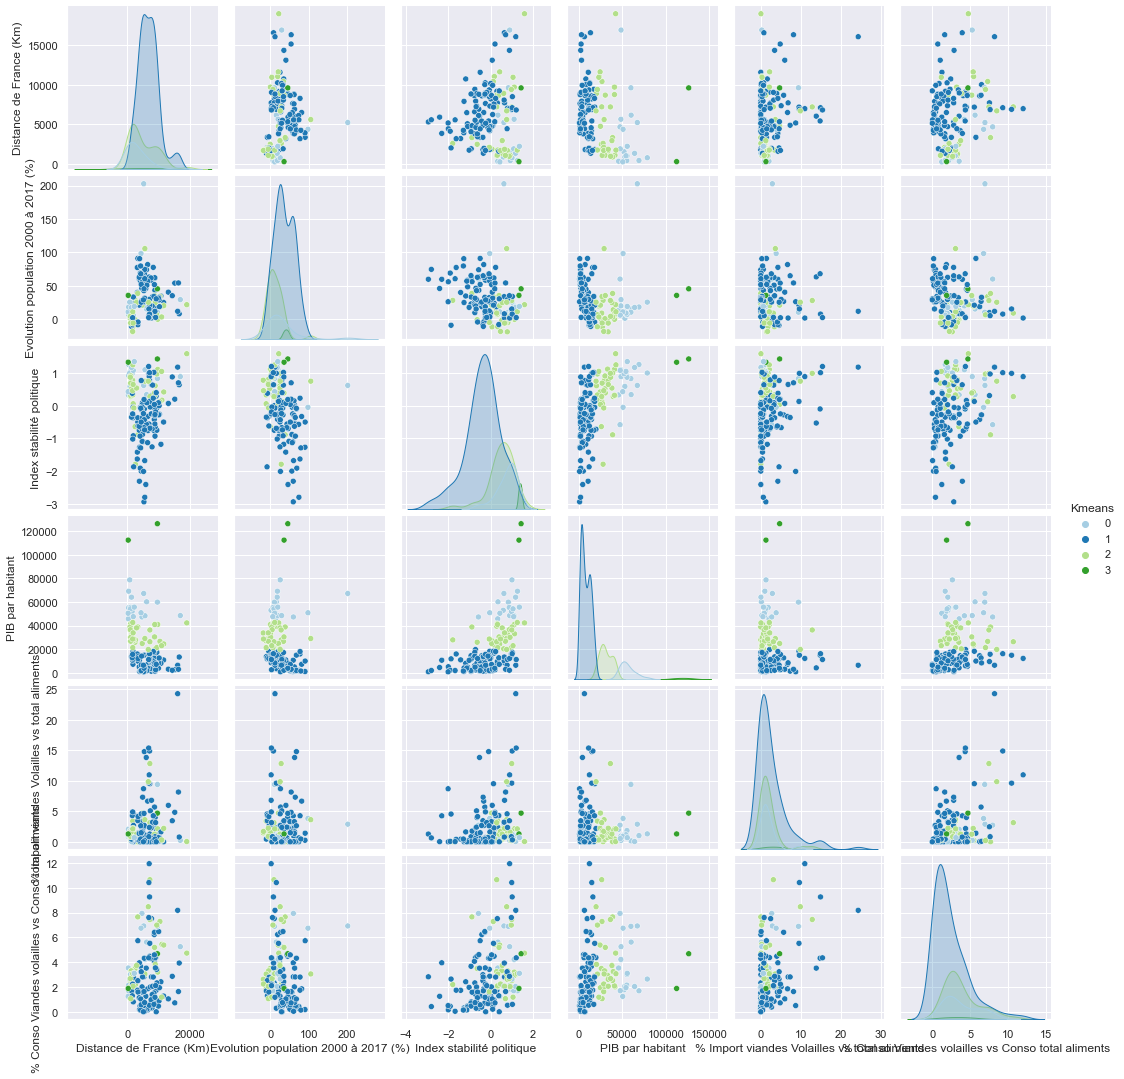

In [48]:
sns.pairplot(df_kmeans, kind="scatter", hue='Kmeans', palette="Paired")

### Centroides

In [49]:
# les moyennes des groupes Kmeans par feature
df_kmeans_gb = df_kmeans.groupby(["Kmeans"]).mean()
df_kmeans_gb

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Kmeans                                                                  
0                   3414.684211                             30.780526   
1                   6728.580952                             35.774667   
2                   4982.828571                             11.850571   
3                   4952.500000                             40.635000   

        Index stabilité politique  PIB par habitant  \
Kmeans                                                
0                        0.746316      55938.200000   
1                       -0.395238       8026.723810   
2                        0.478571      30950.954286   
3                        1.380000     119246.000000   

        % Import viandes Volailles vs total aliments  \
Kmeans                                                 
0                                           1.737895   
1                                           2.673333   
2                                           1.895143   
3                                           2.995000   

        % Conso Viandes volailles vs Conso total aliments  
Kmeans                                                     
0                                                3.708421  
1                                                2.375905  
2                                                3.814857  
3                                                3.280000

In [50]:
# les pays par Cluster
for i in range(0, 4):
    print("Groupe {}:".format(i))
    print(", ".join(df_kmeans[df_kmeans['Kmeans'] ==
          i].index.get_level_values('Zone').sort_values()))

Groupe 0:
Allemagne, Arabie saoudite, Australie, Autriche, Belgique, Canada, Danemark, Finlande, Hong Kong, Irlande, Islande, Koweït, Norvège, Pays-Bas, Royaume-Uni, Suisse, Suède, Émirats arabes unis, États-Unis
Groupe 1:
Afghanistan, Afrique du Sud, Albanie, Algérie, Angola, Arménie, Azerbaïdjan, Bangladesh, Barbade, Belize, Biélorussie, Bolivie, Bosnie-Herzégovine, Botswana, Brésil, Burkina Faso, Bénin, Cambodge, Cameroun, Cap-Vert, Chine, Colombie, Cuba, Côte d'Ivoire, Djibouti, Dominique, Eswatini, Fidji, Gabon, Gambie, Ghana, Grenade, Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Inde, Indonésie, Irak, Iran, Jamaïque, Jordanie, Kenya, Kirghizistan, Kiribati, Laos, Lesotho, Liban, Liberia, Macédoine du Nord, Madagascar, Malawi, Maldives, Mali, Maroc, Mauritanie, Mexique, Moldavie, Mongolie, Mozambique, Namibie, Nicaragua, Niger, Nigeria, Népal, Ouganda, Ouzbékistan, Pakistan, Paraguay, Philippines, Pérou, Rwanda, République centrafricaine, République dominica

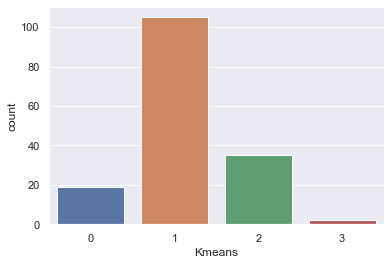

In [51]:
# repartition nb de pays /cluster
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Kmeans", data=df_kmeans)

### Visualisation cluster 

In [52]:
df_kmeans_iso = pd.merge(df_iso_pays, df_kmeans, on="Zone")

In [53]:
df_kmeans_iso = df_kmeans_iso.sort_values(by='Kmeans', ascending=True)

In [54]:
df_kmeans_iso['Kmeans'] = df_kmeans_iso['Kmeans'].astype(object)

In [55]:
fig = px.choropleth(
    df_kmeans_iso,
    locations=df_kmeans_iso['Code ISO'],
    color=df_kmeans_iso['Kmeans'],
    hover_name=df_kmeans_iso["Zone"],
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'Kmeans': 'Cluster'})

fig.update_layout(
    title_text='Les Clusters avec Kmeans', title_x=0.5,
    font=dict(size=10))
fig.show()

### Heatmap

In [56]:
df_kmeans = df_kmeans.reset_index("Zone")
df_kmeans = df_kmeans.set_index('Kmeans')
df_kmeans = df_kmeans.drop(['Zone'], axis=1)
df_kmeans

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Kmeans                                                                  
0                        6166.0                                 15.40   
1                        8216.0                                 10.11   
1                        8602.0                                 18.90   
2                        2486.0                                 -0.60   
1                        9086.0                                 26.17   
...                         ...                                   ...   
1                        6822.0                                  2.60   
1                       14362.0                                 35.26   
1                        5340.0                                 45.57   
1                        9237.0                                 30.61   
1                        5147.0                                 29.03   

        Index stabilité politique  PIB par habitant  \
Kmeans                                                
0                            0.34           60109.7   
1                            0.00           14621.2   
1                           -0.42           14524.6   
2                           -0.64           25926.4   
1                           -0.72           19721.3   
...                           ...               ...   
1                            1.20           11304.0   
1                            0.88            2235.7   
1                            0.19            3952.9   
1                            0.40            7257.8   
1                           -0.24            6518.8   

        % Import viandes Volailles vs total aliments  \
Kmeans                                                 
0                                               0.15   
1                                               0.22   
1                                               0.02   
2                                               0.94   
1                                               2.18   
...                                              ...   
1                                              15.38   
1                                               3.45   
1                                               4.65   
1                                               0.00   
1                                               0.00   

        % Conso Viandes volailles vs Conso total aliments  
Kmeans                                                     
0                                                    5.62  
1                                                    1.27  
1                                                    6.23  
2                                                    3.49  
1                                                    4.37  
...                                                   ...  
1                                                    4.35  
1                                                    2.86  
1                                                    1.63  
1                                                    0.00  
1                                                    0.00  

[161 rows x 6 columns]

In [57]:
# Centrage et réduction des données
scaler = preprocessing.StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

In [58]:
# On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_kmeans_c_r = pd.DataFrame(
    X_scaled_kmeans, index=df_kmeans.index, columns=df_kmeans.columns)
df_kmeans_gb_c_r = df_kmeans_c_r.groupby(["Kmeans"]).mean()
df_kmeans_gb_c_r

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Kmeans                                                                  
0                     -0.667123                              0.025162   
1                      0.209738                              0.195955   
2                     -0.252191                             -0.622219   
3                     -0.260215                              0.362172   

        Index stabilité politique  PIB par habitant  \
Kmeans                                                
0                        0.890180          1.727292   
1                       -0.388326         -0.578421   
2                        0.590315          0.524794   
3                        1.599888          4.773944   

        % Import viandes Volailles vs total aliments  \
Kmeans                                                 
0                                          -0.183339   
1                                           0.076565   
2                                          -0.139649   
3                                           0.165937   

        % Conso Viandes volailles vs Conso total aliments  
Kmeans                                                     
0                                                0.358495  
1                                               -0.202703  
2                                                0.403322  
3                                                0.178063

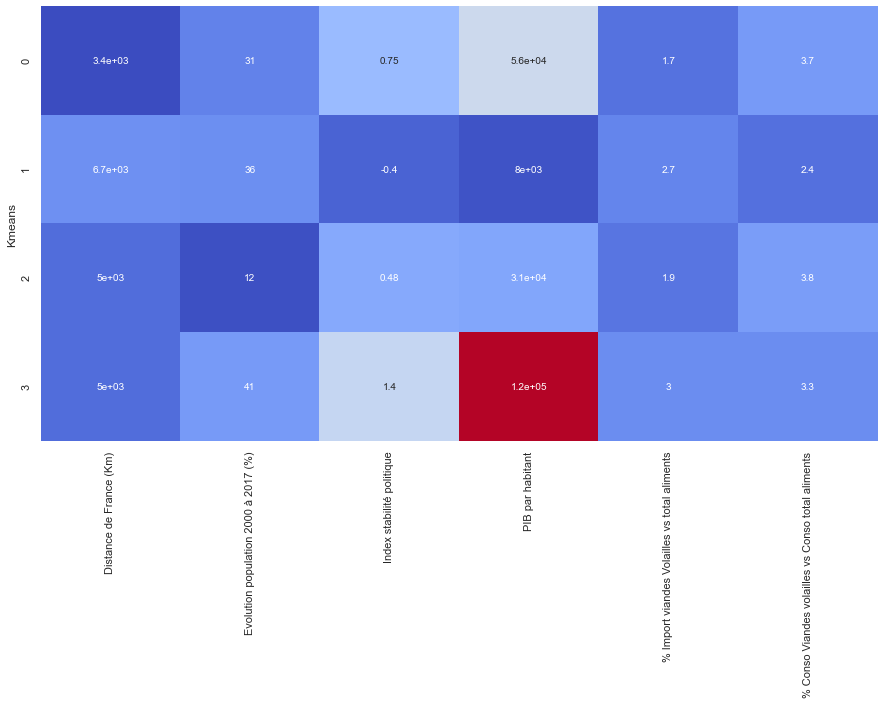

In [59]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_kmeans_gb_c_r, cmap=cmap, annot=df_kmeans_gb,
            annot_kws={'size': 10}, cbar=None)
plt.savefig('heatmap_cah.png')

## Analyse en Composante Principale (ACP)

l'ACP est une méthode statistique qui permet de représenter les données sur un graphique facilement interprétables.

In [60]:
df_acp = df

In [61]:
X = df_acp.select_dtypes('float')

In [62]:
# Initialize
model = pca(n_components=6, normalize=True)

In [63]:
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


### Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

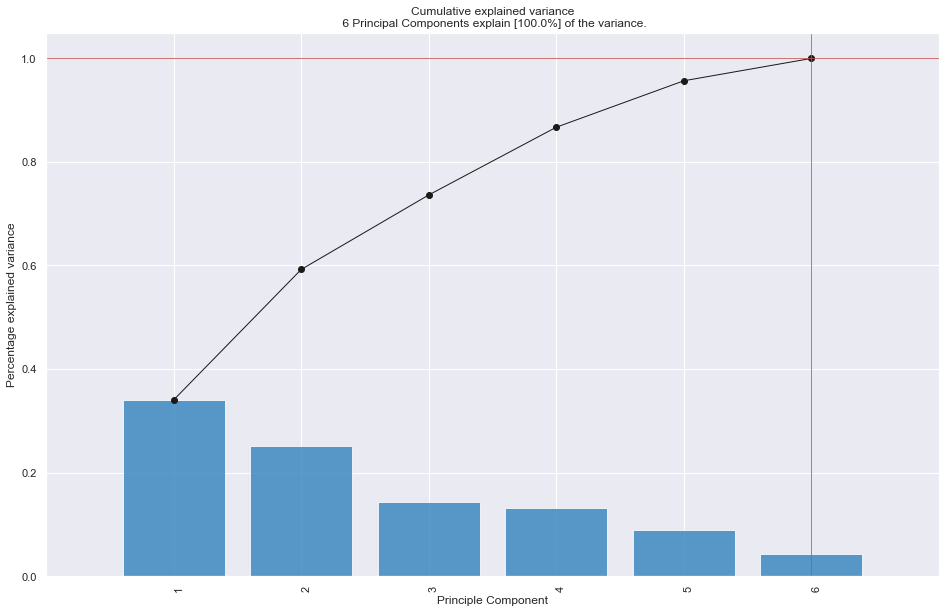

<Figure size 432x288 with 0 Axes>

In [64]:
# Scree plot
fig, ax = model.plot(figsize=(16, 10))

Les 4 premières composantes expliquent 87% de la variance totale des données. On peut donc dire que la dimension intrasèques de cet ensemble de données est raisonnablement égale à 4. Transformons donc la dataframe originelle de 6 variables en une dataframe de 4 variables

[pca] >Plot PC1 vs PC2 with loadings.


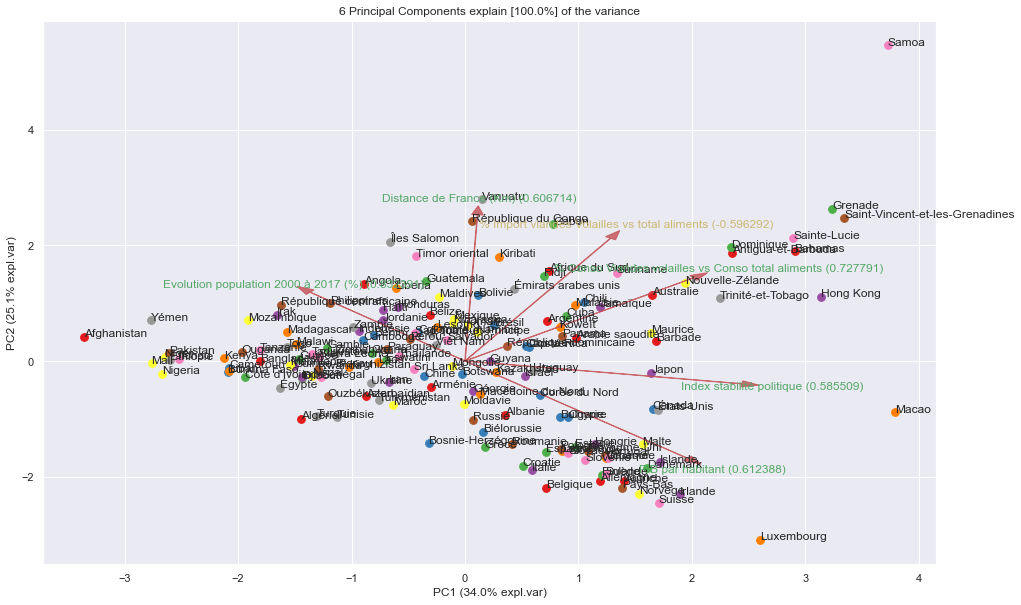

In [65]:
# biplot
fig, ax = model.biplot(label=True, legend=False, figsize=(16, 10))

[pca] >Plot PC1 vs PC2 with loadings.


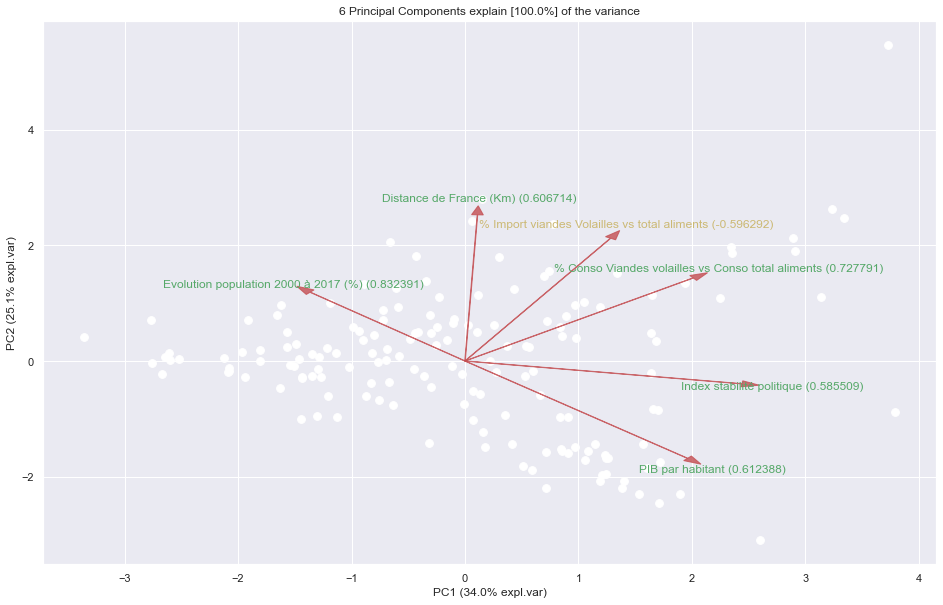

In [66]:
# biplot
fig, ax = model.biplot(cmap=None, label=False, legend=False, figsize=(16, 10))

[pca] >Plot PC1 vs PC2 with loadings.


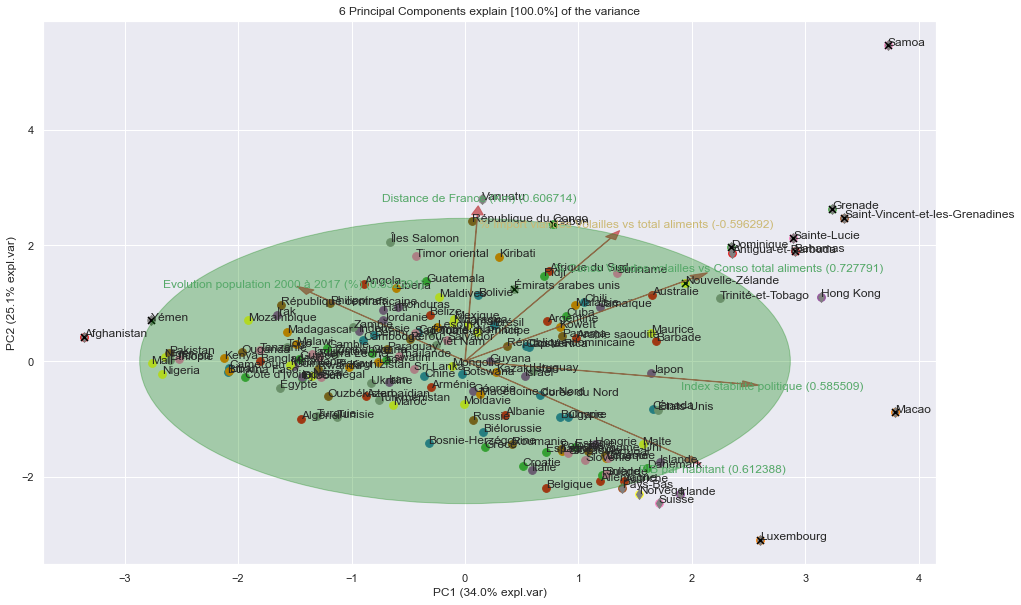

In [67]:
# Outlier
fig, ax = model.biplot(SPE=True, hotellingt2=True,
                       legend=False, figsize=(16, 10))

In [68]:
df = df.reset_index()

In [69]:
df_cah = df_cah.reset_index()

In [70]:
df = pd.concat([df, df_cah[['CAH']]], axis=1)

In [71]:
features = ['Distance de France (Km)',
            'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
            'PIB par habitant', '% Import viandes Volailles vs total aliments',
            '% Conso Viandes volailles vs Conso total aliments']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, ['Kmeans']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

In [72]:
features = ['Distance de France (Km)',
            'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
            'PIB par habitant', '% Import viandes Volailles vs total aliments',
            '% Conso Viandes volailles vs Conso total aliments']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, ['CAH']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

In [73]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])

In [74]:
finalDf_cah = pd.concat([principalDf, df[['CAH']]], axis=1)

In [75]:
finalDf_cah.head()

PCA 1     PCA 2     PCA 3     PCA 4  CAH
0  1.697193 -0.843229  0.571768  0.732752    7
1 -0.360756 -0.266882 -1.007836  0.673407    4
2  0.256869  0.618865 -0.364215  0.438175    7
3  0.068560 -1.019187 -0.437052 -0.749472    1
4 -0.093526  0.734079 -0.173775  0.254173    7

In [76]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])

In [77]:
finalDf_kmeans = pd.concat([principalDf, df[['Kmeans']]], axis=1)

In [78]:
finalDf_kmeans.head()

PCA 1     PCA 2     PCA 3     PCA 4  Kmeans
0  1.697193 -0.843229  0.571768  0.732752       0
1 -0.360756 -0.266882 -1.007836  0.673407       1
2  0.256869  0.618865 -0.364215  0.438175       1
3  0.068560 -1.019187 -0.437052 -0.749472       2
4 -0.093526  0.734079 -0.173775  0.254173       1

### Analyse PCA 1 & PCA2

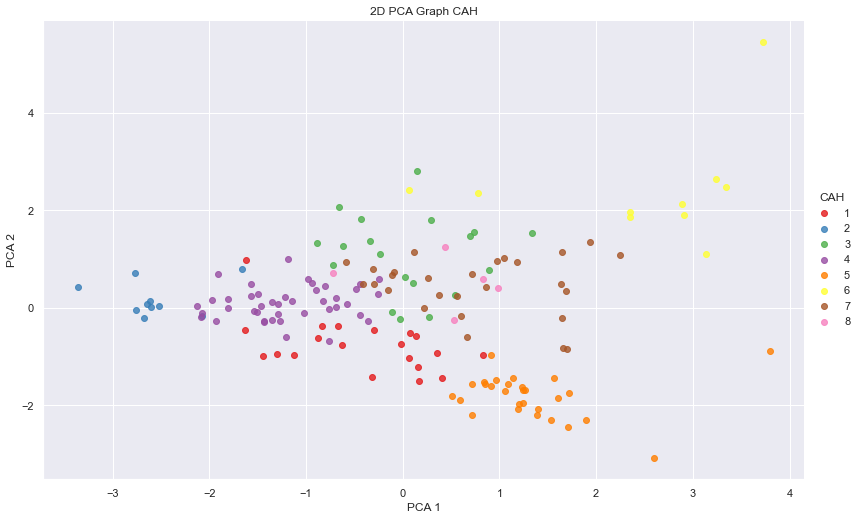

In [79]:
sns.set()
sns.lmplot(
    x='PCA 1',
    y='PCA 2',
    data=finalDf_cah,
    hue='CAH',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('2D PCA Graph CAH')
plt.show()

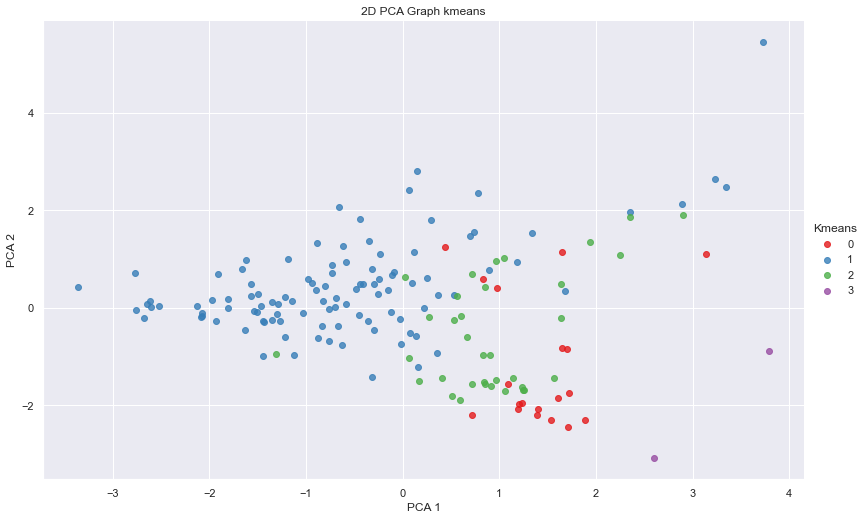

In [80]:
sns.set()
sns.lmplot(
    x='PCA 1',
    y='PCA 2',
    data=finalDf_kmeans,
    hue='Kmeans',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('2D PCA Graph kmeans')
plt.show()

### Analyse PCA 3 & PCA 4

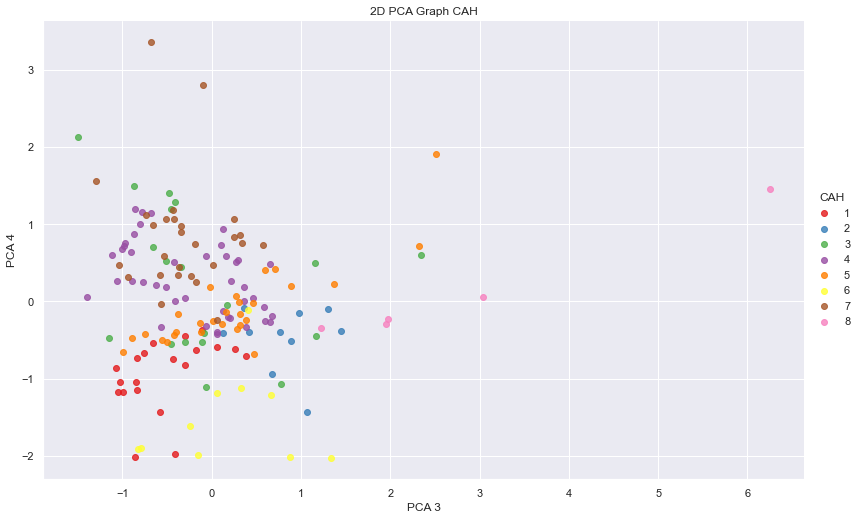

In [81]:
sns.set()
sns.lmplot(
    x='PCA 3',
    y='PCA 4',
    data=finalDf_cah,
    hue='CAH',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('2D PCA Graph CAH')
plt.show()

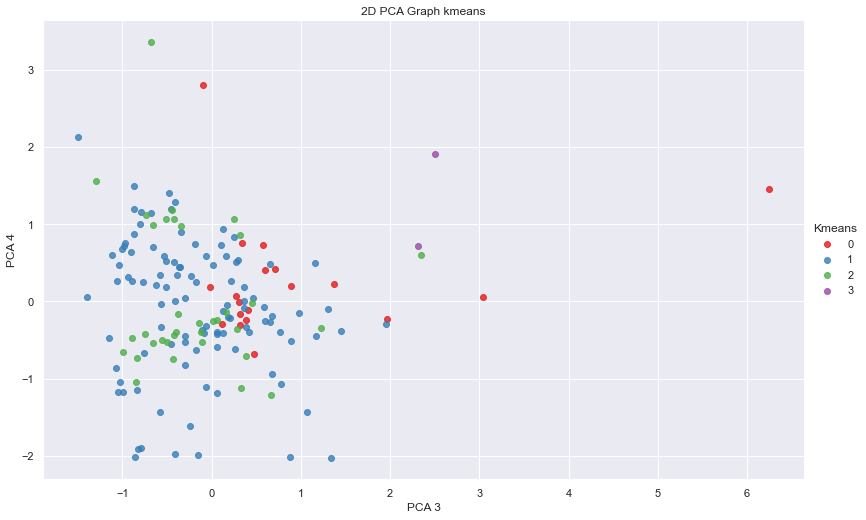

In [82]:
sns.set()
sns.lmplot(
    x='PCA 3',
    y='PCA 4',
    data=finalDf_kmeans,
    hue='Kmeans',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('2D PCA Graph kmeans')
plt.show()

### Analyse PCA 1 PCA2 et PCA3

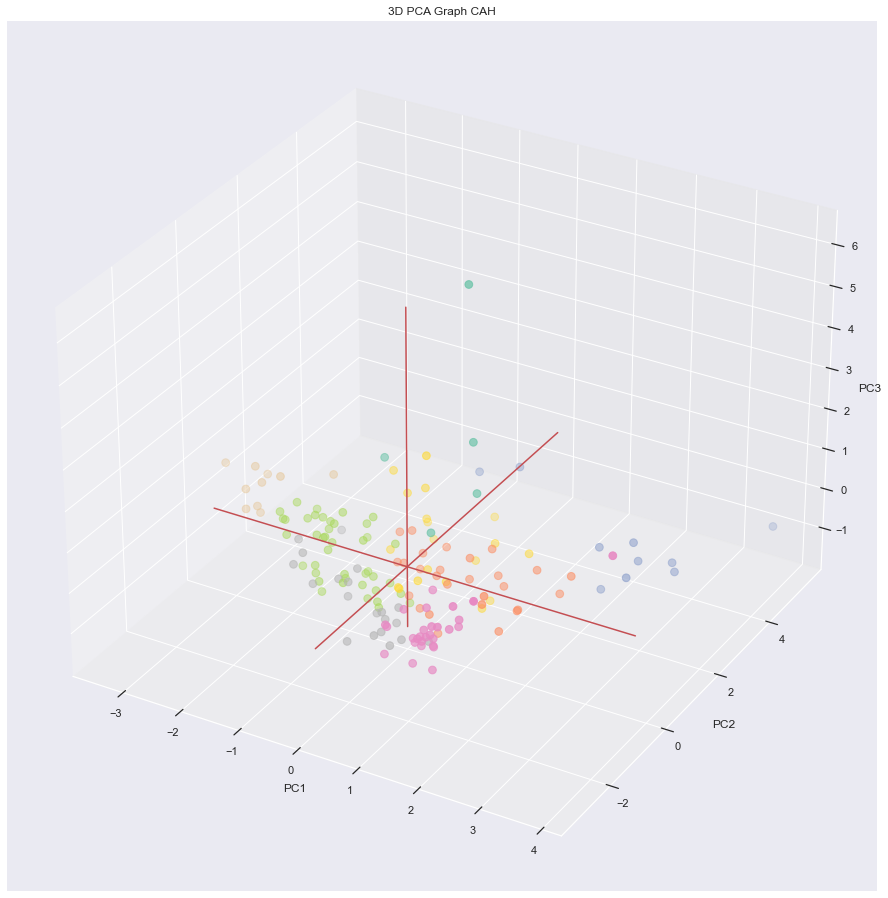

In [83]:
my_color = finalDf_cah['CAH']


# Plot initialisation
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf_cah['PCA 1'], finalDf_cah['PCA 2'],
           finalDf_cah['PCA 3'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf_cah['PCA 1']), max(
    finalDf_cah['PCA 1'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf_cah['PCA 2']), max(
    finalDf_cah['PCA 2'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0, 0),
             (min(finalDf_cah['PCA 3']), max(finalDf_cah['PCA 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')


# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Graph CAH")
plt.show()

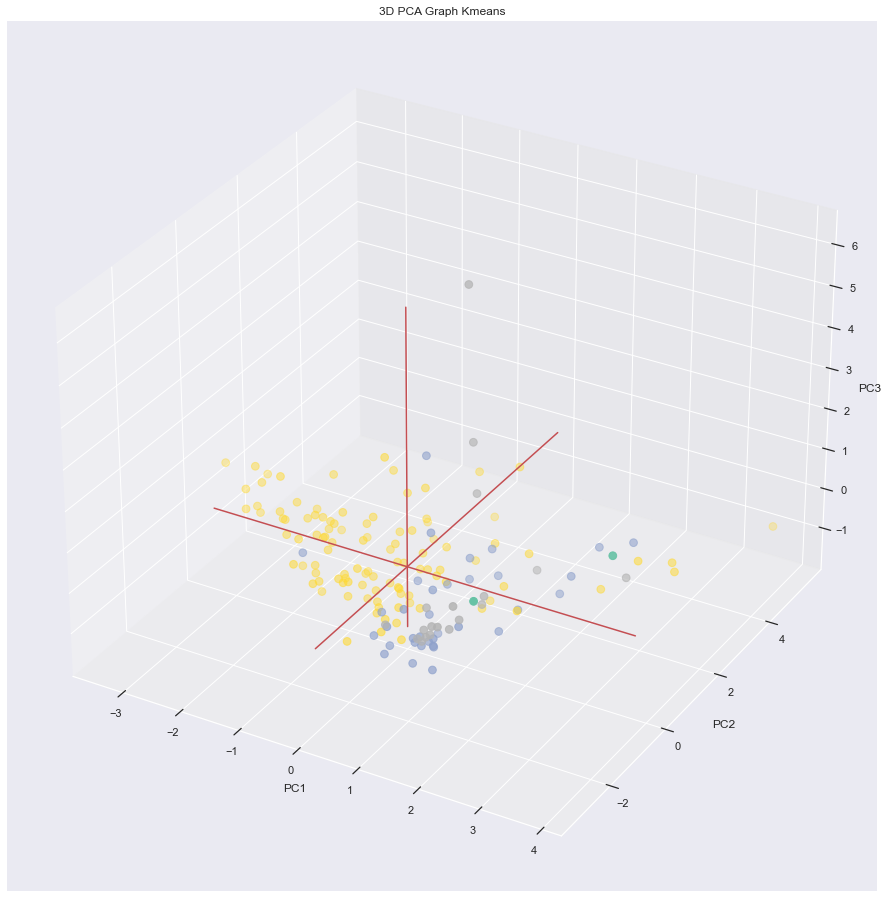

In [84]:
my_color = finalDf_kmeans['Kmeans']


# Plot initialisation
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf_kmeans['PCA 1'], finalDf_kmeans['PCA 2'],
           finalDf_kmeans['PCA 3'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf_kmeans['PCA 1']), max(
    finalDf_kmeans['PCA 1'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf_kmeans['PCA 2']), max(
    finalDf_kmeans['PCA 2'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0, 0),
             (min(finalDf_kmeans['PCA 3']), max(finalDf_kmeans['PCA 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Graph Kmeans")
plt.show()

In [85]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7, 6))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

<Figure size 1152x1152 with 0 Axes>

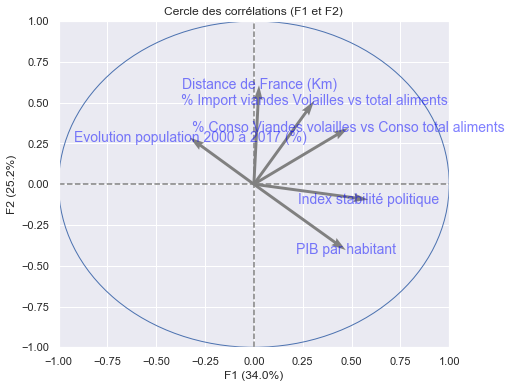

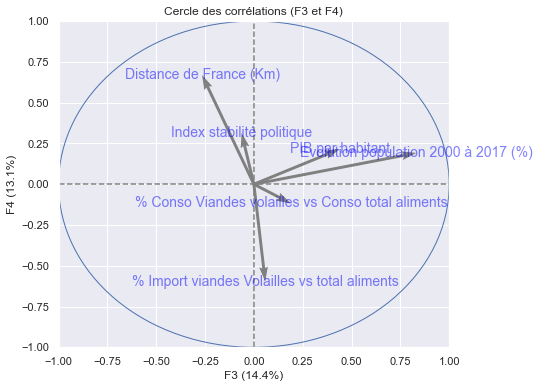

In [86]:
n_comp = 4
pcs = pca.components_
fig = plt.figure(figsize=(16, 16))
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

## Tests d'hypothèses
Nous utiliserons la statistique inférentielle pour interpreter nos données afin d'aquérir une meilleure connaissance

### Verification de la normalité

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Distance de France (Km)


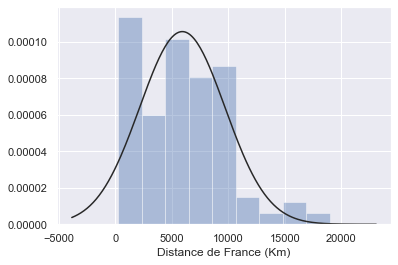

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Evolution population 2000 à 2017 (%)


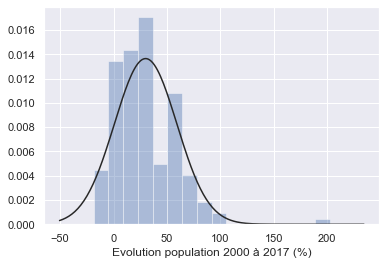

Index stabilité politique


C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



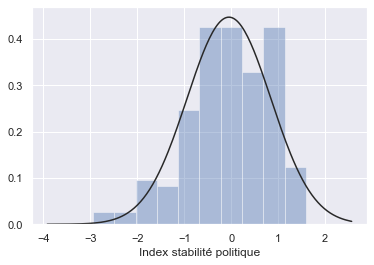

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



PIB par habitant


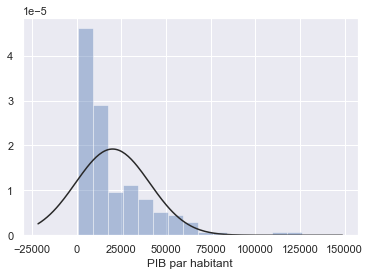

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



% Import viandes Volailles vs total aliments


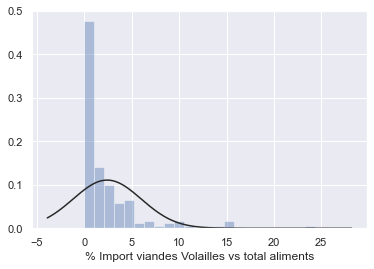

C:\Users\perso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



% Conso Viandes volailles vs Conso total aliments


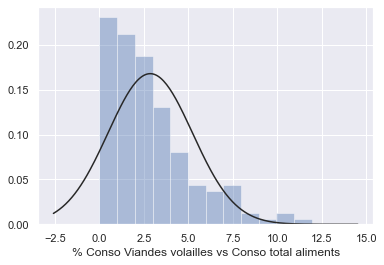

In [87]:
# distplot des variables continues
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col], fit=norm, kde=False)
    print(col)
    plt.show()

In [88]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('float'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

Distance de France (Km)----------------------------------------------- 0.9452864527702332 6.803209544159472e-06
On rejette H0 : la distribution ne suit pas une loi normale
Evolution population 2000 à 2017 (%)---------------------------------- 0.9019612669944763 6.84328016475888e-09
On rejette H0 : la distribution ne suit pas une loi normale
Index stabilité politique--------------------------------------------- 0.9638231992721558 0.0003262597310822457
On rejette H0 : la distribution ne suit pas une loi normale
PIB par habitant------------------------------------------------------ 0.7985070943832397 1.2729518773704068e-13
On rejette H0 : la distribution ne suit pas une loi normale
% Import viandes Volailles vs total aliments-------------------------- 0.6610954999923706 9.511830927447295e-18
On rejette H0 : la distribution ne suit pas une loi normale
% Conso Viandes volailles vs Conso total aliments--------------------- 0.8832217454910278 6.188993761924166e-10
On rejette H0 : la distribut

Distance de France (Km)


<Figure size 432x288 with 0 Axes>

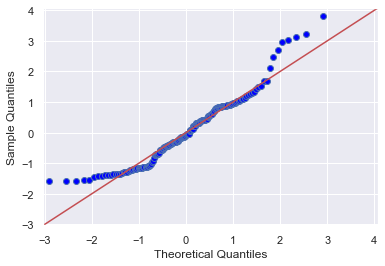

Evolution population 2000 à 2017 (%)


<Figure size 432x288 with 0 Axes>

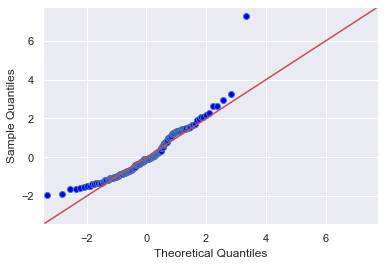

Index stabilité politique


<Figure size 432x288 with 0 Axes>

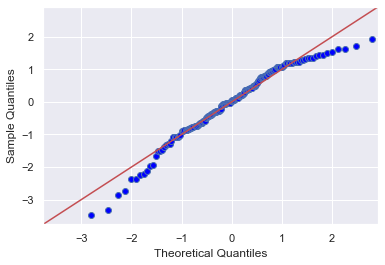

PIB par habitant


<Figure size 432x288 with 0 Axes>

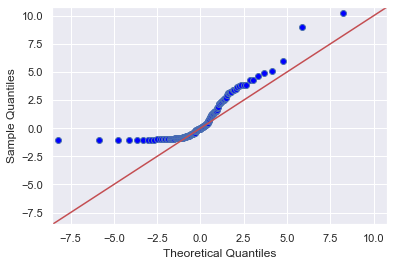

% Import viandes Volailles vs total aliments


<Figure size 432x288 with 0 Axes>

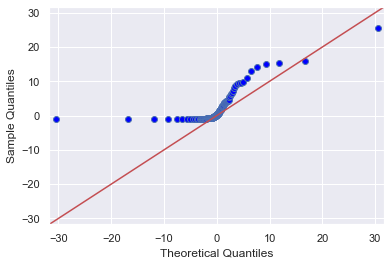

% Conso Viandes volailles vs Conso total aliments


<Figure size 432x288 with 0 Axes>

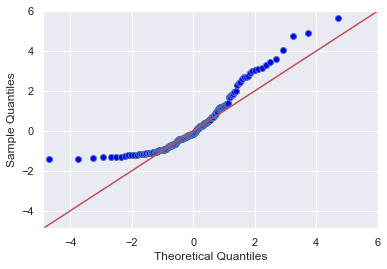

In [89]:
# qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('float'):
    plt.figure()
    sm.qqplot(df[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

Nous remarquons un fort écart à la normalité.

### Analyse non parametique (Kruskal-Wallis)
Kruskal-Wallis: equivalent non parametrique de l'ANOVA

* H0 = La moyenne de tous les traitements est égale
* Ha = Au moins 2 moyennes sont différentes

In [90]:
# test de kruskal
stat, pvalue = stats.kruskal(df['Distance de France (Km)'], df['Evolution population 2000 à 2017 (%)'],
                             df['Index stabilité politique'], df['PIB par habitant'],
                             df['% Import viandes Volailles vs total aliments'],
                             df['% Conso Viandes volailles vs Conso total aliments'])
print(f"kruskal wallis stat: {stat}")
print(f"pvalue: {pvalue}")

kruskal wallis stat: 784.8944750715909
pvalue: 2.143013476095776e-167


In [91]:
seuil = 0.05
if pvalue > seuil:
    print("On ne peux pas rejetter H0: La moyenne de tous les traitements est égale")
else:
    print("On rejette H0 : Au moins 2 moyennes sont différentes")

On rejette H0 : Au moins 2 moyennes sont différentes
